### Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Reading DataSet

In [52]:
cal = pd.read_csv('calories.csv')
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [53]:
cal.shape    # rows - 15000 , columns - 2

(15000, 2)

In [54]:
exc = pd.read_csv('exercise.csv')
exc.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### Concating the calories column from cal table in exc table and making new DataFrame as df

In [55]:
df = pd.concat([exc,cal['Calories']],axis=1)

In [56]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [57]:
df.shape    # Rows - 15000 , Columns - 9

(15000, 9)

In [58]:
df1 = df.copy()

In [59]:
df.describe()    # checking statiscall measures

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [60]:
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


## Data Preprocessing

#### 1) Checking Null Values

In [61]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Inference - There are no null values in the data

#### 2) Checking Duplicates

In [62]:
df.duplicated().sum()

0

Inference - There are no dupicates in the data

## EDA

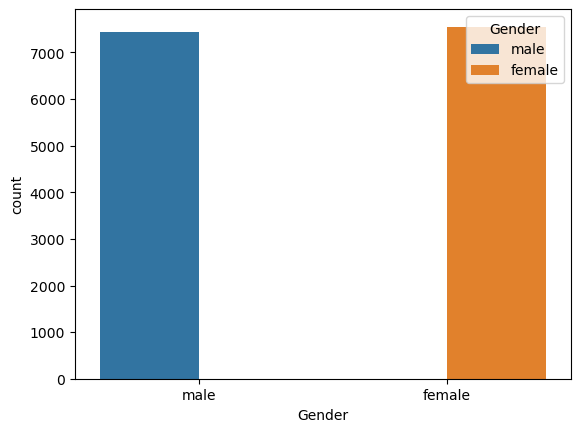

In [63]:
sns.countplot(x=df['Gender'], hue=df['Gender'])
plt.show()

Inference - Gender is equally distrubted

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


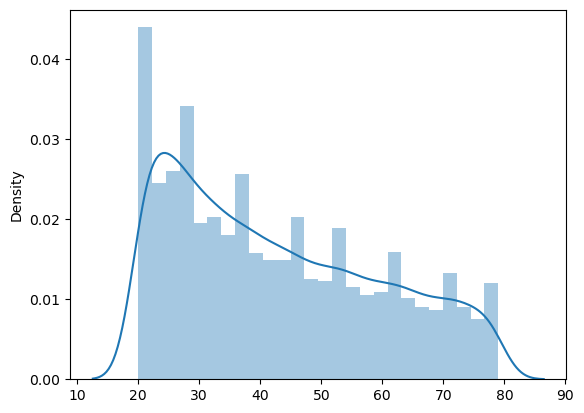

In [64]:
sns.distplot(x = df['Age'])
plt.show()

Inference - According to the data age group of between 20 and 30 more comes to gym

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


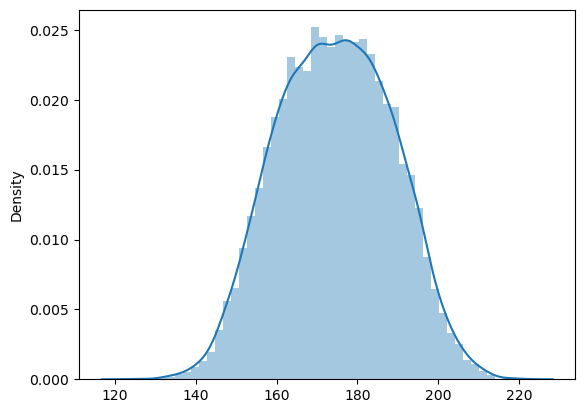

In [65]:
sns.distplot(x = df['Height'])
plt.show()

Inference - It is normally distributed

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


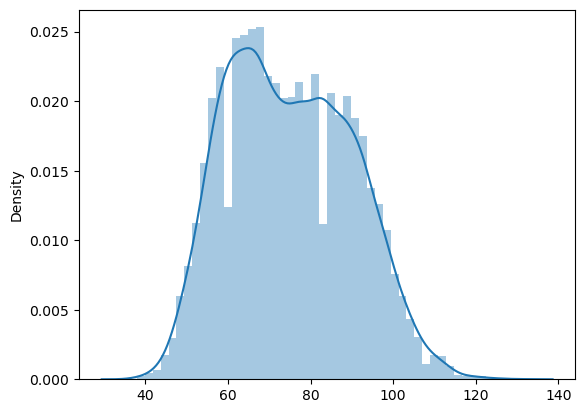

In [66]:
sns.distplot(x = df['Weight'])
plt.show()

Inference - According to the data set we have more people having weight of 60 to 75

### Correlation

In [67]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')


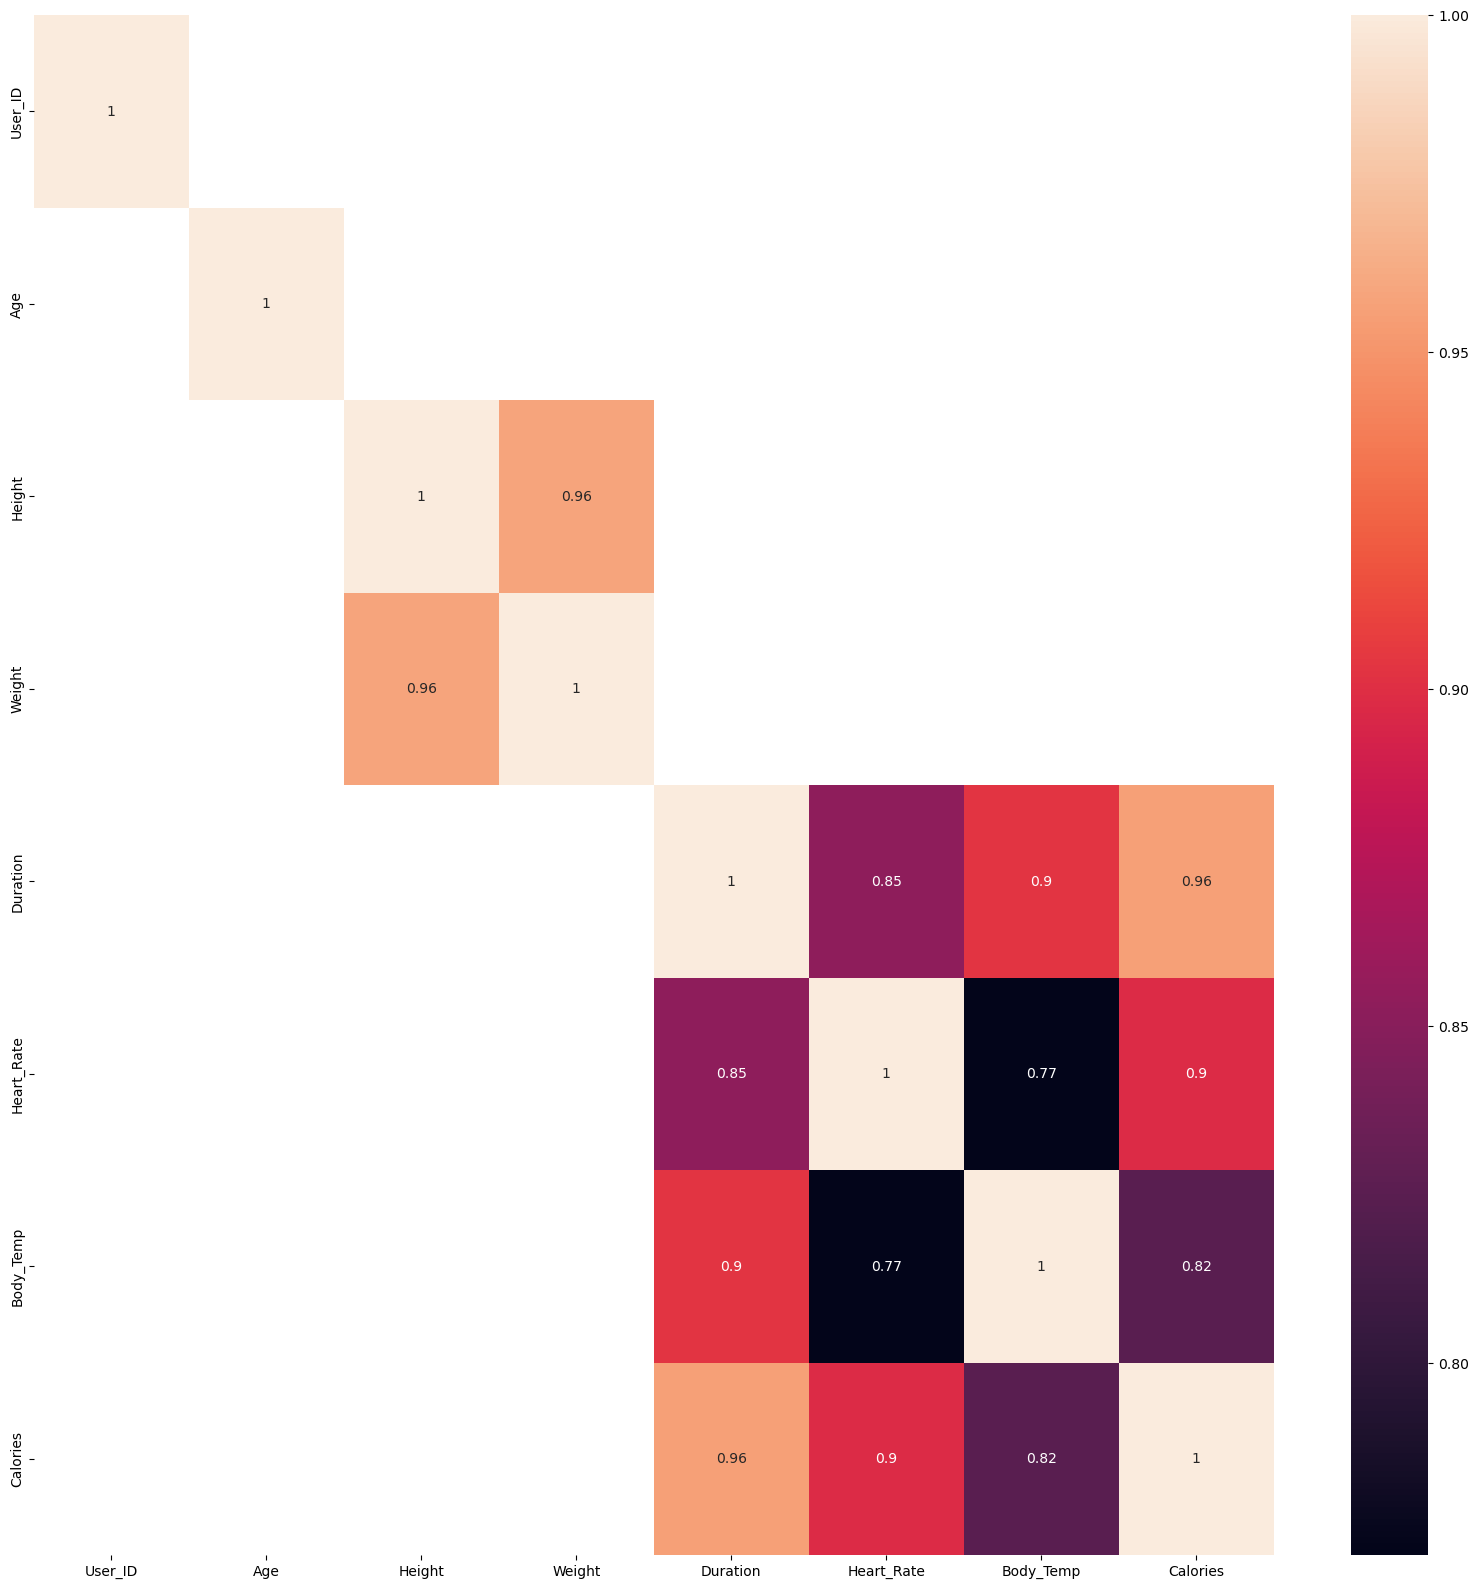

In [68]:
corr = df[num_cols].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True)
plt.show()

### Inference
1) Weight,Height and Duration are highly correlated <br>
2) Heart Rate,Body_Temp,Duration are highly correlated <br>

### Checking Outliers

In [82]:
a = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
Gender,0.0,0.00,0.0,0.0,0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,20.00,20.0,20.0,21.00,39.0,74.0,75.0,76.0,77.0,78.0,79.0
Height,123.0,144.00,147.0,149.0,151.00,175.0,197.0,199.0,200.0,202.0,205.0,222.0
Weight,36.0,47.00,49.0,51.0,53.00,74.0,100.0,101.0,103.0,105.0,109.0,132.0
Duration,1.0,1.00,2.0,2.0,3.00,16.0,28.0,29.0,29.0,29.0,30.0,30.0
Heart_Rate,67.0,75.00,77.0,78.0,80.00,96.0,111.0,112.0,113.0,114.0,115.0,128.0
Body_Temp,37.1,37.80,38.0,38.1,38.40,40.2,41.0,41.0,41.0,41.1,41.2,41.5
Calories,1.0,3.99,5.0,6.0,8.95,79.0,200.0,206.0,213.0,222.0,238.0,314.0


In [87]:
cols = df.columns[1:]
print(cols)

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')


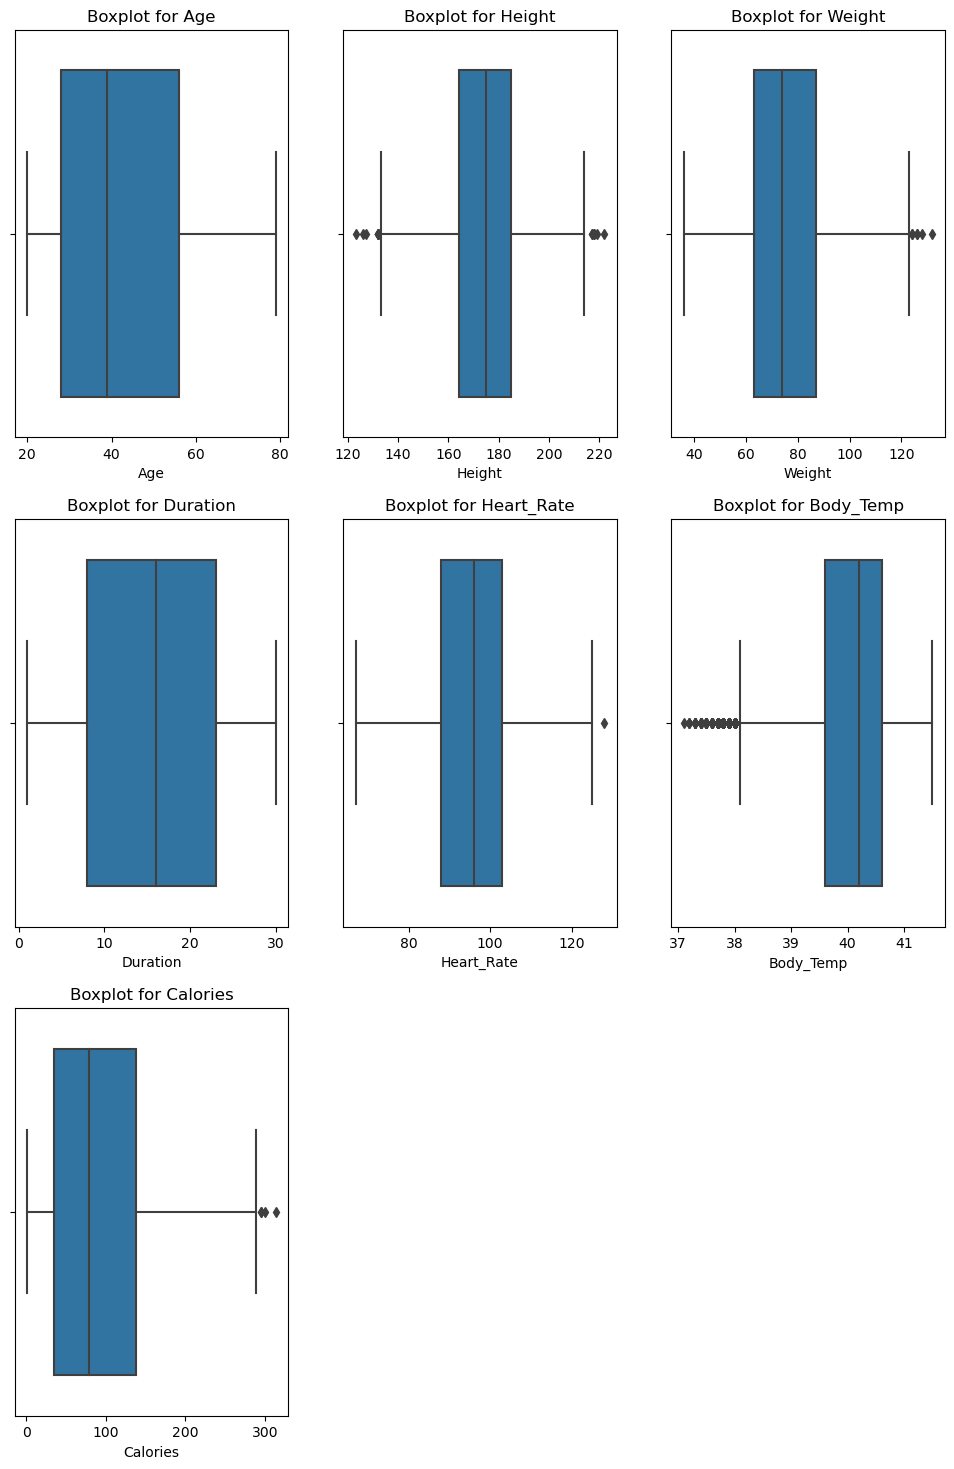

In [91]:
plt.figure(figsize=(12,18))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

### Inference -
1)There are minimul number of outliers

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


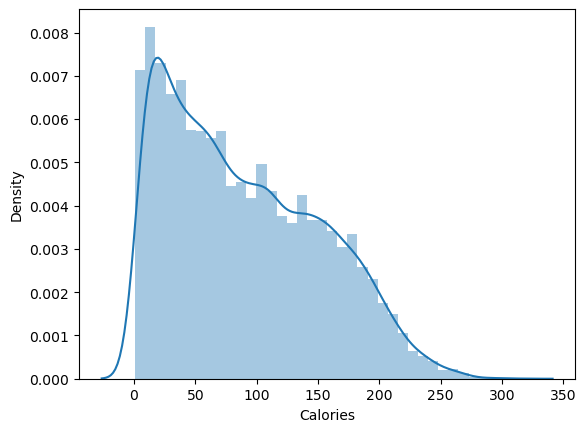

In [70]:
sns.distplot(df['Calories'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


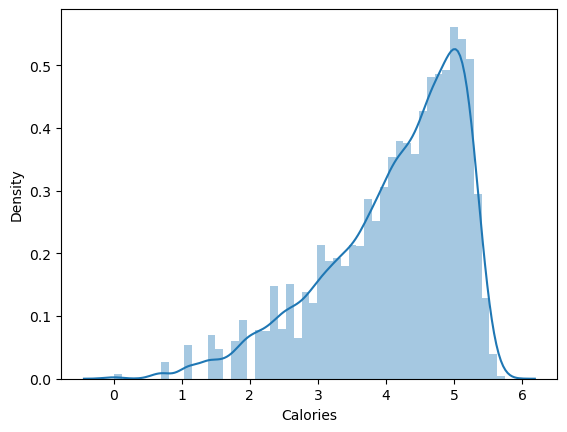

In [71]:
sns.distplot(np.log(df['Calories']))     
plt.show()  

In [74]:
df.drop('User_ID',axis=1,inplace=True)

In [76]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [77]:
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [78]:
df['Gender'] = df['Gender'].map({'female':1,'male':0})
df.head()    

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [43]:
# x = df.drop('Calories',axis = 1)
# y = np.log(df['Calories'])
# print(type(x))
# print(type(y))
# print(x.shape)
# print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(15000, 7)
(15000,)


In [79]:
x = df.drop('Calories',axis = 1)
y = df['Calories']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(15000, 7)
(15000,)


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 7)
(3000, 7)
(12000,)
(3000,)


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)
    
def mscore(model):
    print('Train Score',model.score(x_train,y_train))  # Train R2 Score
    print('Test Score',model.score(x_test,y_test)) 

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [34]:
mscore(lr1)

Train Score 0.9671008318886297
Test Score 0.9675716936557676


In [35]:
ypred_lr1 =  lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 8.352515329028597
MSE 128.5593427847571
RMSE 11.33840124465337
R2 Score 0.9675716936557676


In [36]:
# actual_ypred_lr1 = np.exp(ypred_lr1)

# res_df = pd.DataFrame({'Actual_y_test':np.exp(y_test),'Pred':actual_ypred_lr1})
# res_df.head(10)

In [37]:
actual_ypred_lr1 = ypred_lr1

res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':actual_ypred_lr1})
res_df.head(10)

,Actual_y_test,Pred
12283,144.0,149.104640
1986,122.0,133.490894
3974,21.0,2.426608
9641,24.0,21.259290
4517,34.0,23.802891
13155,67.0,71.849301
14568,4.0,9.923952
9872,35.0,39.041011
1157,95.0,113.016633
10830,116.0,114.658037


### XGBoost

In [38]:
from xgboost import XGBRegressor

In [39]:
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
mscore(xg)

Train Score 0.9995604030625329
Test Score 0.9988085356061409


In [41]:
ypred_lr2 =  xg.predict(x_test)
eval_model(y_test,ypred_lr2)

MAE 1.5231523794929187
MSE 4.723462206135375
RMSE 2.1733527569484377
R2 Score 0.9988085356061409


In [42]:
actual_ypred_lr2 = ypred_lr2

res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':actual_ypred_lr2})
res_df.head(10)

,Actual_y_test,Pred
12283,144.0,143.512207
1986,122.0,123.312027
3974,21.0,20.827568
9641,24.0,23.179810
4517,34.0,35.080238
13155,67.0,69.656830
14568,4.0,3.791096
9872,35.0,34.190655
1157,95.0,98.762192
10830,116.0,113.224289


### This is how machine learning algorithms can also use for calories prediction